In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
import torch
import torch.nn as nn
import numpy as np
from torchvision import models, transforms
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from data import data_reader

Tensor = torch.Tensor
rand_m = np.random.random

In [2]:
MODEL_NAME = 'resnet34_cos'
if not os.path.exists('weights/'):
    !mkdir weights
if not os.path.exists('weights/{}'.format(MODEL_NAME)):
    !mkdir weights/{MODEL_NAME}

In [3]:
from models import model_resnet34

In [4]:
model = model_resnet34(6).to('cuda')

In [5]:
optim = torch.optim.Adam(model.parameters())
loss_func = torch.nn.CrossEntropyLoss()

In [6]:
from data import data_reader
class args:
    bs = 256
    path = 'train2000/'

dr = data_reader(args, 'train2000/train2000.csv')

train_loader, test_loader = dr.get_train_loader()

In [7]:
from utils.train_model import cyc_trainer

In [8]:
resnet34_cyc_trainer = cyc_trainer(model, 2, 2, train_loader=train_loader, test_loader=test_loader, 
                                  optim=optim, loss_func=loss_func, model_name='resnet34_cos', save=False)

In [9]:
resnet34_cyc_trainer.train()

Snapshot#  0
Cycle 0 | Epoch # 0 | lr = 0.001
Cycle 0 | Epoch 0 | Batch # 0 Train Loss 1.96324 
Cycle 0 | Epoch 0 | Batch # 1 Train Loss 0.49962 
Cycle 0 | Epoch 0 | Batch # 2 Train Loss 0.51580 
Cycle 0 | Epoch 0 | Batch # 3 Train Loss 0.56814 
Cycle 0 | Epoch 0 | Batch # 4 Train Loss 0.46213 
Cycle 0 | Epoch 0 | Batch # 5 Train Loss 0.30492 
Cycle 0 | Epoch 0 | Batch # 6 Train Loss 0.62622 
Cycle 0 | Epoch 0 | Epoch Train Loss 0.70572

Cycle 0 | Epoch 0 | Epoch Train Acc 73.250%
Cycle 0 | Epoch 0 | Epoch Val Loss 0.56878
Cycle 0 | Epoch 0 | Epoch Val Acc 80.250%
Cycle 0 | Epoch # 1 | lr = 0.0008117449009293668
Cycle 0 | Epoch 1 | Batch # 0 Train Loss 0.48657 
Cycle 0 | Epoch 1 | Batch # 1 Train Loss 0.36978 
Cycle 0 | Epoch 1 | Batch # 2 Train Loss 0.29306 
Cycle 0 | Epoch 1 | Batch # 3 Train Loss 0.38586 
Cycle 0 | Epoch 1 | Batch # 4 Train Loss 0.25417 
Cycle 0 | Epoch 1 | Batch # 5 Train Loss 0.17060 
Cycle 0 | Epoch 1 | Batch # 6 Train Loss 0.42265 
Cycle 0 | Epoch 1 | Epoch Trai

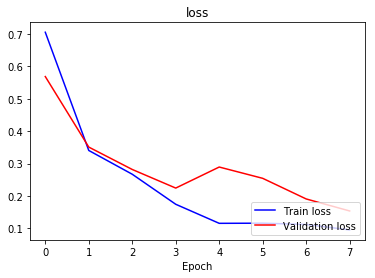

In [10]:
resnet34_cyc_trainer.plot_loss()

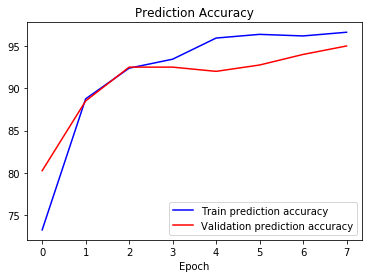

In [11]:
resnet34_cyc_trainer.plot_acc()

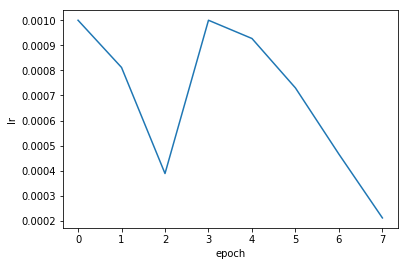

In [12]:
resnet34_cyc_trainer.plot_lr()